# Task 2 - Mall Customer Segmentation 

In [1]:
import pandas as pd

In [2]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Cleaning 

In [7]:
customer_data = customer_data.drop("CustomerID", axis = 1 )

In [8]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis - EDA 

## Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

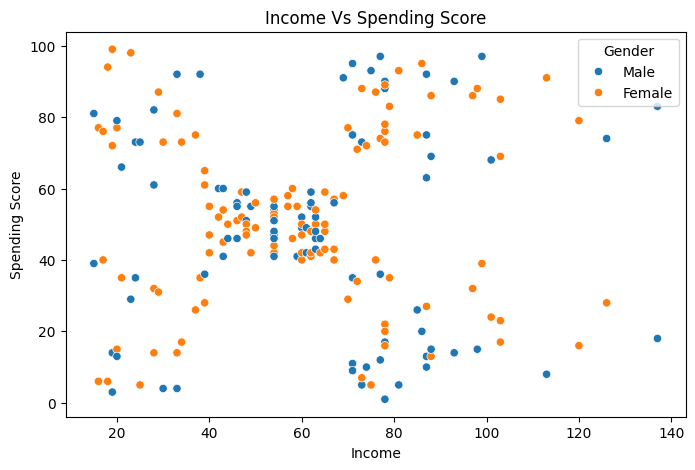

In [10]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = customer_data, x = "Annual Income (k$)" , y = "Spending Score (1-100)" , hue = "Gender")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income Vs Spending Score")
plt.show()

In [11]:
main_features = customer_data.drop(["Gender", "Age"] , axis = 1)

In [12]:
main_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaled_features = scaler.fit_transform(main_features)

In [15]:
scaled_features

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
scaled_df = pd.DataFrame(scaled_features, columns=["Annual Income (k$)","Spending Score (1-100)"])

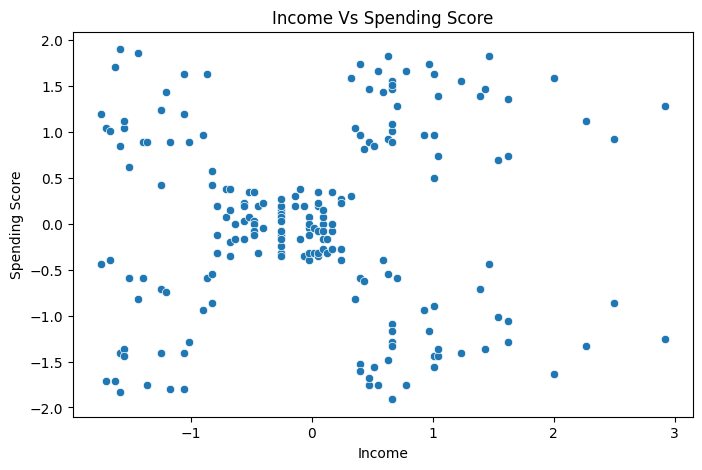

In [17]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = scaled_df, x = "Annual Income (k$)" , y = "Spending Score (1-100)")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income Vs Spending Score")
plt.show()

# Clustering

In [18]:
from sklearn.cluster import KMeans
k = 5
kmean = KMeans(n_clusters = k , init = "k-means++", random_state = 42)
kmean.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [19]:
labels = kmean.labels_
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [20]:
scaled_df["Cluster"] = kmean.labels_
scaled_df

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


In [21]:
print(kmean.cluster_centers_)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


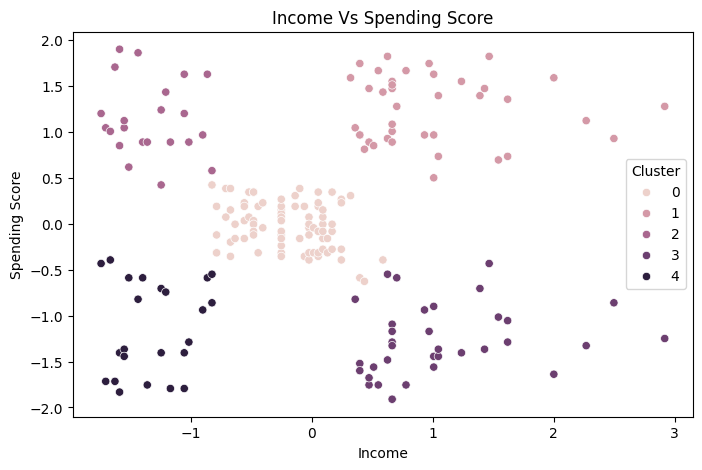

In [22]:
plt.figure(figsize = (8,5))
sns.scatterplot(data = scaled_df , x = "Annual Income (k$)" , y = "Spending Score (1-100)" , hue = "Cluster")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income Vs Spending Score")
plt.show()